Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 

The attributes are as follows: 

 Sales -- Unit sales (in thousands) at each location

 Competitor Price -- Price charged by competitor at each location

 Income -- Community income level (in thousands of dollars)

 Advertising -- Local advertising budget for company at each location (in thousands of dollars)

 Population -- Population size in region (in thousands)

 Price -- Price company charges for car seats at each site

 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the 
car seats at each site

 Age -- Average age of the local population

 Education -- Education level at each location

 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location

 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
company_df=pd.read_csv("Company_Data .csv")
company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [2]:
#check how many data points in the data set
company_df.count()

Sales          400
CompPrice      400
Income         400
Advertising    400
Population     400
Price          400
ShelveLoc      400
Age            400
Education      400
Urban          400
US             400
dtype: int64

In [3]:
#check how many rows and columns
company_df.shape

(400, 11)

In [4]:
#find all the information of the data set
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


#here sales is our target variable and others are independent variables
#here sales are in numerical format
#so convert it into a categorical format

In [5]:
#lets check the data type of sales before conversion
company_df["Sales"].dtypes

dtype('float64')

In [6]:
company_df["Sales"]=pd.cut(x=company_df["Sales"],bins=[-1,4,8,12,16],labels=["poor","medium","good","Excellent"])

In [7]:
company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,good,138,73,11,276,120,Bad,42,17,Yes,Yes
1,good,111,48,16,260,83,Good,65,10,Yes,Yes
2,good,113,35,10,269,80,Medium,59,12,Yes,Yes
3,medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,medium,141,64,3,340,128,Bad,38,13,Yes,No


#here i divide the sales data set into four groups

#poor <- -1 to 4

#medium<-4 to 8

#good<-8 to 12

#excellent<-12 to 16

here we can see that the values of Sales changed

In [8]:

company_df["Sales"].dtypes

CategoricalDtype(categories=['poor', 'medium', 'good', 'Excellent'], ordered=True)

In [9]:
company_df["Sales"].value_counts()

medium       200
good         137
poor          36
Excellent     26
Name: Sales, dtype: int64

# Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\sathi\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


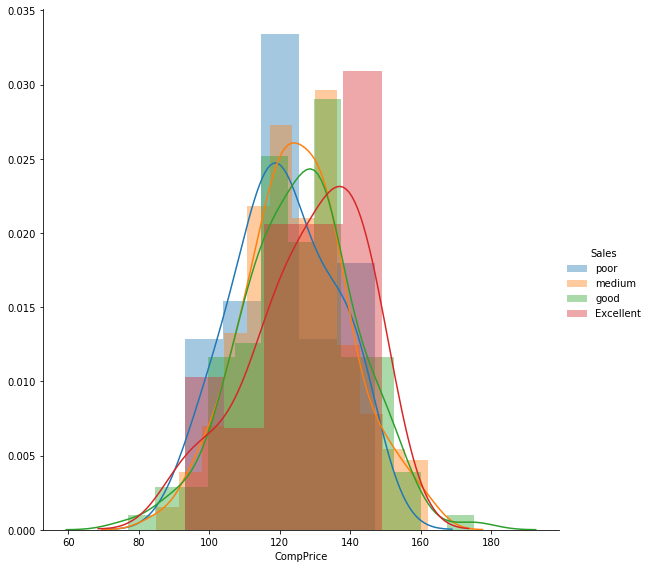

In [11]:
#Univariate analysis of  company price based sale
g = sns.FacetGrid(company_df, hue = "Sales",size=8)
g.map(sns.distplot, "CompPrice")
g.add_legend()
plt.show()

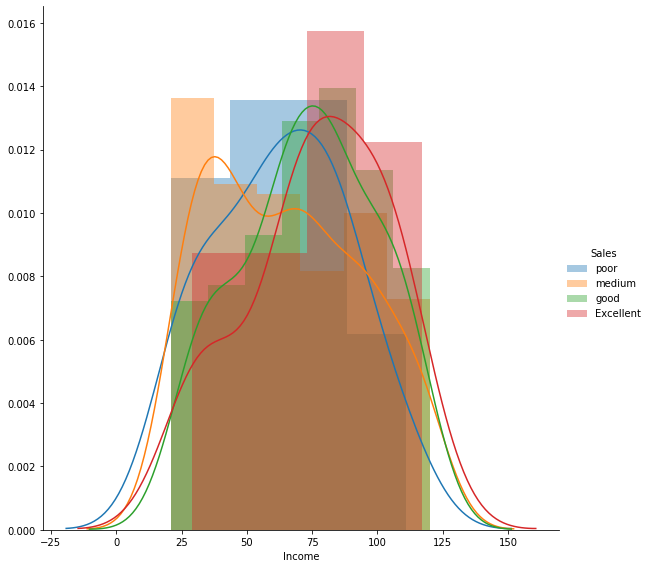

In [12]:
#Univariate analysis of  income based sale
g = sns.FacetGrid(company_df, hue = "Sales",size=8)
g.map(sns.distplot, "Income")
g.add_legend()
plt.show()

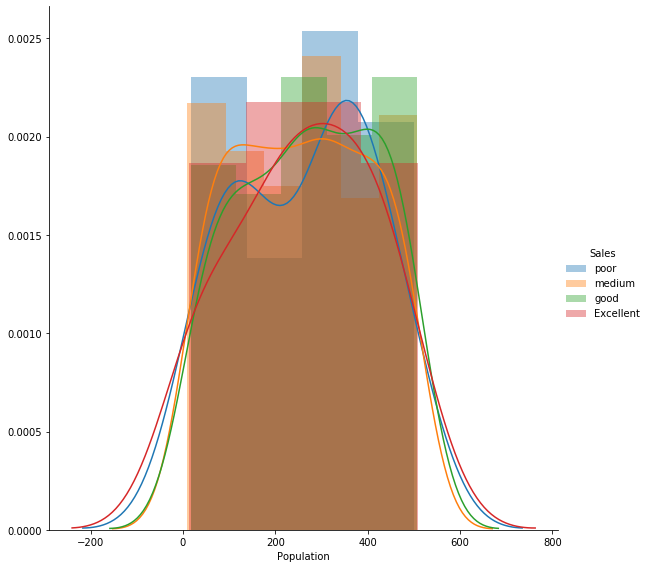

In [13]:
#Univariate analysis of  population based sale
g = sns.FacetGrid(company_df, hue = "Sales",size=8)
g.map(sns.distplot, "Population")
g.add_legend()
plt.show()

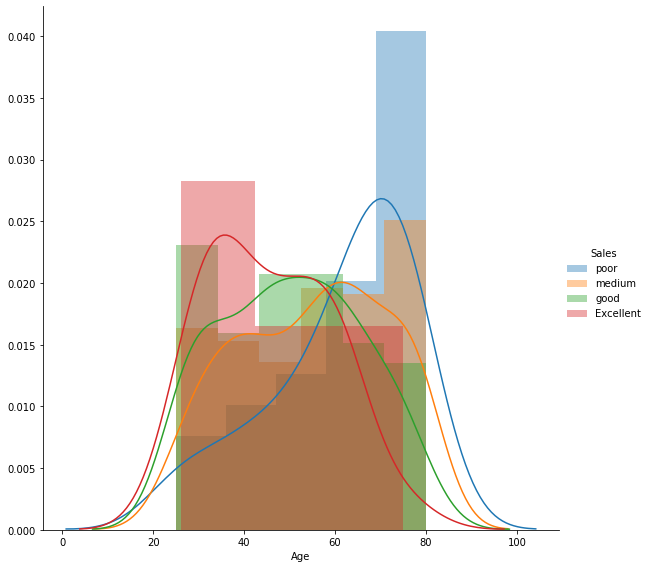

In [14]:
#Univariate analysis of  company price based sale
g = sns.FacetGrid(company_df, hue = "Sales",size=8)
g.map(sns.distplot, "Age")
g.add_legend()
plt.show()

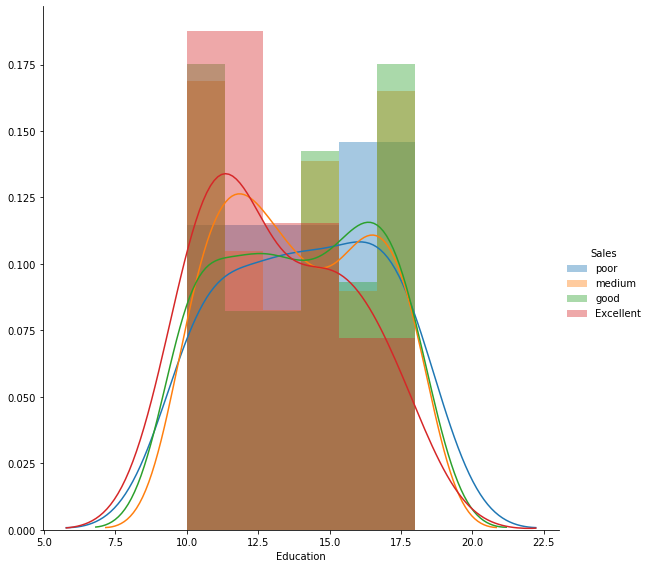

In [15]:
#Univariate analysis of  company price based sale
g = sns.FacetGrid(company_df, hue = "Sales",size=8)
g.map(sns.distplot, "Education")
g.add_legend()
plt.show()

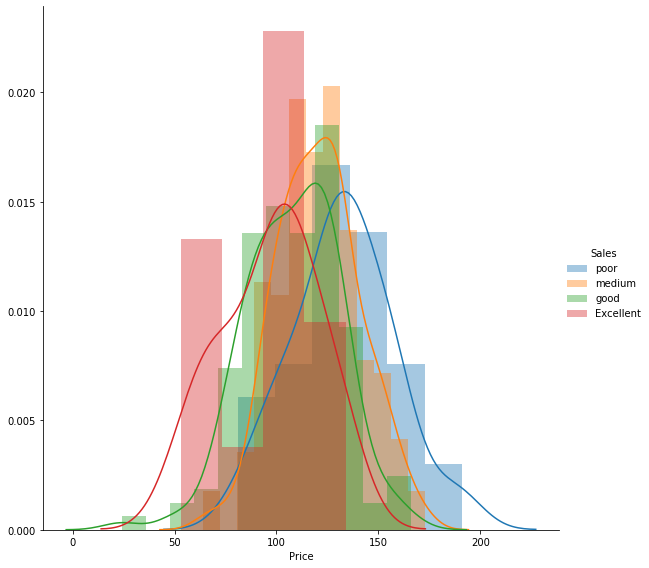

In [16]:
#Univariate analysis of  price based sale
g = sns.FacetGrid(company_df, hue = "Sales",size=8)
g.map(sns.distplot, "Price")
g.add_legend()
plt.show()

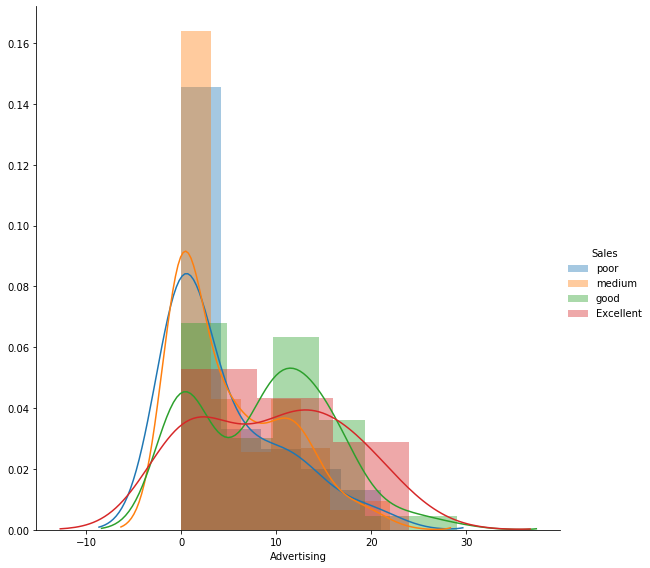

In [17]:
#Univariate analysis of  advertising based sale
g = sns.FacetGrid(company_df, hue = "Sales",size=8)
g.map(sns.distplot, "Advertising")
g.add_legend()
plt.show()

CONCLUSION:
    Here we compare the sale with all variables, our target is to find  cloth manufacturing company is interested to know about the segment or attributes causes high sale. here Price(Price company charges for car seats at each site) will be the best attributes causes high sales

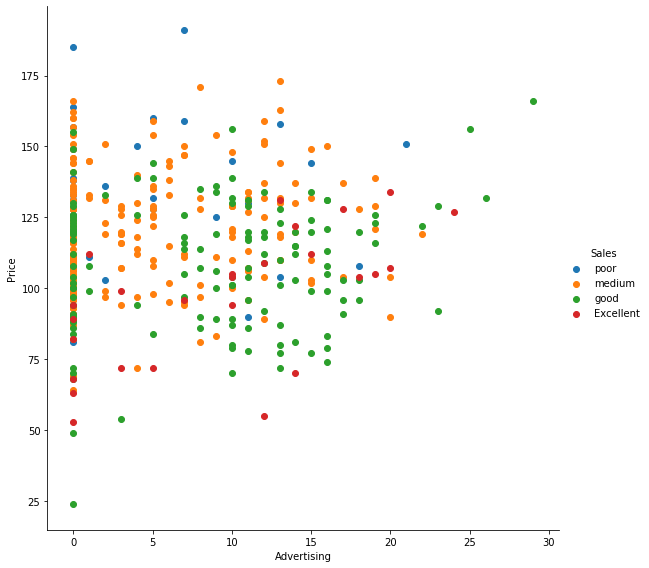

In [18]:
#scatterplot of advertising and Price
g = sns.FacetGrid(company_df, hue = "Sales",size=8)
g.map(plt.scatter, "Advertising","Price")
g.add_legend()
plt.show()

# Feature Engineering

In [19]:
#check the presence of null values in a data set
company_df.isnull().sum()

Sales          1
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [20]:
#sales column contain one null values
#remove that null values
company_df=company_df.dropna()

In [21]:
company_df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

all null value were removed

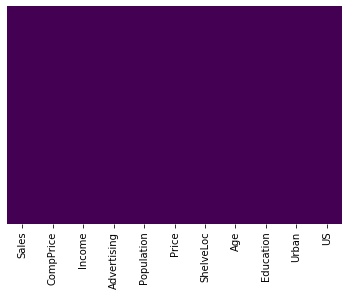

In [22]:
#Using heat map to check the null value
sns.heatmap(data=company_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
#convert all categorical data into a numerical format for model building

In [24]:
# Import label encoder 
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()

In [25]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 11 columns):
Sales          399 non-null category
CompPrice      399 non-null int64
Income         399 non-null int64
Advertising    399 non-null int64
Population     399 non-null int64
Price          399 non-null int64
ShelveLoc      399 non-null object
Age            399 non-null int64
Education      399 non-null int64
Urban          399 non-null object
US             399 non-null object
dtypes: category(1), int64(7), object(3)
memory usage: 34.9+ KB


In [26]:
#convert sales into numerical format
company_df['Sales']= label_encoder.fit_transform(company_df['Sales']) 
  
company_df['Sales'].unique()

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 2, 3, 0], dtype=int64)

In [27]:
#convert ShelveLoc into numerical format
company_df['ShelveLoc']= label_encoder.fit_transform(company_df['ShelveLoc']) 
  
company_df['ShelveLoc'].unique()

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0, 1, 2], dtype=int64)

In [28]:
#convert Urban into numerical format
company_df['Urban']= label_encoder.fit_transform(company_df['Urban']) 
  
company_df['Urban'].unique()

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 0], dtype=int64)

In [29]:
#convert US into numerical format
company_df['US']= label_encoder.fit_transform(company_df['US']) 
  
company_df['US'].unique()

C:\Users\sathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([1, 0], dtype=int64)

In [30]:
#check the final data set
company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,2,141,64,3,340,128,0,38,13,1,0


In [31]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 399
Data columns (total 11 columns):
Sales          399 non-null int32
CompPrice      399 non-null int64
Income         399 non-null int64
Advertising    399 non-null int64
Population     399 non-null int64
Price          399 non-null int64
ShelveLoc      399 non-null int32
Age            399 non-null int64
Education      399 non-null int64
Urban          399 non-null int32
US             399 non-null int32
dtypes: int32(4), int64(7)
memory usage: 31.2 KB


# Training and splitting the data

seperate feature and target variables from a data set

In [32]:
X=company_df.drop(["Sales"],axis=1)   ###features
y=company_df["Sales"]    ##target


In [33]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [34]:
y.head()

0    1
1    1
2    1
3    2
4    2
Name: Sales, dtype: int32

In [35]:
#splitting the data


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building a Random Forest Model

In [37]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
model1=RandomForestClassifier()
model1.fit(X_train,y_train)

C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
#prediction
y_pred=model1.predict(X_test)
y_pred

array([2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2])

In [39]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6


In [40]:
n_estimators=[1,2,4,8,16,32,64,100,200]
train_results=[]
test_results=[]

for i in n_estimators:
    clf=RandomForestClassifier(n_estimators=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    train_pred=clf.predict(X_train)
    model_acc=metrics.accuracy_score(y_train, train_pred)
    train_results.append(model_acc)
 
        
    test_pred=clf.predict(X_test)
    model_acc=metrics.accuracy_score(y_test, test_pred)
    test_results.append(model_acc)

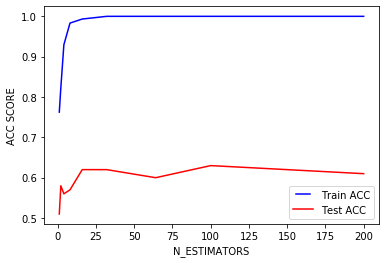

In [41]:
from matplotlib.legend_handler import HandlerLine2D
line1,=plt.plot(n_estimators,train_results,"b", label="Train ACC")
line2,=plt.plot(n_estimators,test_results,"r", label="Test ACC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("ACC SCORE")
plt.xlabel("N_ESTIMATORS")
plt.show()

here we can see that both Train AUC and Test Auc ,we get different curve in this case we can see that estimators between 50 and 75 , the curve bit in peek position now i am going to give n_estimator=60

In [42]:
#create second model n_estimators=60
model2=RandomForestClassifier(n_estimators=60)
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
#prediction
y_pred2=model2.predict(X_test)
y_pred2

array([2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2])

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.62


accuracy improved in second model compared to first model

In [45]:
#create third model n_estimators=65
model3=RandomForestClassifier(n_estimators=65)
model3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=65,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
#prediction
y_pred3=model3.predict(X_test)
y_pred3

array([2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2])

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.6


accuracy improved in third model 

In [48]:
#create fourth model n_estimators=70
model4=RandomForestClassifier(n_estimators=65)
model4.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=65,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
#prediction
y_pred4=model4.predict(X_test)
y_pred4

array([2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2])

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.64


#accuracy is very less compared to previous model

here i am taking model4 is the best model with 64% accuracy


# HYPER PARAMETER TUNING

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters={'n_estimators':(10,30,50,70,90,100)
           ,'criterion':('gini','entropy')
           ,'max_depth':(3,5,7,9,10)
           ,'min_samples_split':(2,4,6)
           ,'max_features':('auto','sqrt')}

In [56]:
RandomForest_grid=GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score=False),param_grid=parameters,cv=3,verbose=True)

In [57]:
RandomForest_grid_model=RandomForest_grid.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:  3.8min finished
C:\Users\sathi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [58]:
RandomForest_grid_model.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [59]:
RandomForest_grid_model.best_score_

0.6655518394648829

In [61]:
#create a new model using best estimators
final_model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [62]:
final_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [63]:
#prediction
y_pred=final_model.predict(X_test)
y_pred

array([2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2])

In [64]:
#check the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.63
